# Imports

In [1]:
import time
import psutil
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 60 (delta 14), reused 50 (delta 7), pack-reused 0
Unpacking objects: 100% (60/60), 22.99 MiB | 10.04 MiB/s, done.


In [3]:
df = pd.read_csv("/kaggle/working/ENCS5141Datasets/BankNotesDataset.csv",index_col=0)
df.describe()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_246,v_247,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255
count,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,...,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000
mean,1.212995,1.204855,1.614074,1.603912,1.754493,0.772892,1.061728,1.029191,1.399374,1.379324,...,1.360101,1.075888,1.420618,1.672021,0.886281,1.193987,0.915244,1.033586,1.188619,1.660768
std,1.460750,1.417384,1.578595,1.633488,1.828556,1.164312,1.493370,1.475949,1.591379,1.561145,...,1.491093,1.435099,1.661894,1.688684,1.340346,1.577617,1.335918,1.395005,1.461009,1.620754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081231
50%,0.643254,0.703254,1.276952,1.247524,1.294879,0.000000,0.240614,0.319880,0.873371,0.891365,...,0.927966,0.406859,0.786744,1.259272,0.051424,0.464241,0.097816,0.398608,0.558941,1.276748
75%,2.092841,2.041682,2.751267,2.593737,3.018940,1.269562,1.765016,1.633481,2.354793,2.228684,...,2.209718,1.784710,2.504917,2.788023,1.428620,1.988529,1.494967,1.663317,2.059749,2.739542
max,10.361509,9.754471,7.938003,9.515128,9.583521,8.533129,10.700576,10.720987,10.997601,8.869824,...,9.516924,9.747485,9.462851,10.498020,10.097586,9.408921,7.514771,11.567399,8.275887,9.846251


# Processing the dataset

In [126]:
df.head()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination
0,0.000000,0.802783,4.799193,3.520272,3.906448,2.964886,2.276473,0.472117,0.000000,0.351116,...,0.319955,5.005167,5.144637,0.000000,0.717125,0.0,4.724614,0.000000,AUD,100_1
1,1.282011,0.169436,4.367540,4.476254,5.645983,2.173897,0.638572,0.000000,0.149849,0.516939,...,0.671412,4.548221,2.671707,0.000000,0.317925,0.0,2.648906,0.656381,AUD,100_1
2,1.956406,0.000000,5.244660,3.611655,5.085964,3.766434,0.000000,1.865016,2.853455,1.840774,...,0.434040,6.429610,2.465012,0.000000,0.197883,0.0,0.823947,1.539916,AUD,100_1
3,0.382722,3.727718,4.409414,3.093557,6.277169,0.000000,1.368437,0.000000,1.095514,0.958835,...,2.279172,4.439319,0.273129,0.438889,2.423372,0.0,1.724243,0.000000,AUD,100_1
4,0.619588,0.071276,3.780865,3.637381,4.144943,3.829269,0.811821,0.387360,1.005720,1.084254,...,0.000000,6.559031,4.807416,0.017139,0.000000,0.0,2.969594,0.000000,AUD,100_1


## Checking for null values

In [127]:
null_counts = df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

if not columns_with_null.empty:
    print("Columns with null values and their count:")
    print(columns_with_null)
else:
    print("No columns contain null values.")

No columns contain null values.


## Checking for column with zero summation

In [128]:
float_columns = df.select_dtypes(include=['float64'])
zero_sum_columns = float_columns.columns[(float_columns.sum() == 0)]

if len(zero_sum_columns) > 0:
    print("Float columns with sum equal to 0:")
    print(zero_sum_columns)
else:
    print("No float columns have a sum equal to 0.")

No float columns have a sum equal to 0.


## Checking for rows with zero summation

In [129]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_df = df.drop(columns=categorical_columns)
rows_with_zero_sum = numeric_df[numeric_df.sum(axis=1) == 0]

if not rows_with_zero_sum.empty:
    print("Rows with sum equal to 0, excluding categorical columns:")
    print(rows_with_zero_sum)
else:
    print("There are no rows with sum equal to 0, excluding categorical columns.")

There are no rows with sum equal to 0, excluding categorical columns.


## Separating the denomination and orientation columns

In [4]:
new_columns = df['Denomination'].str.split('_', n=1, expand=True)
new_columns.columns = ['Denomination', 'Orientation']
df = pd.concat([df, new_columns['Orientation']], axis=1)
df['Denomination'] = new_columns['Denomination']
df['Orientation'] = df['Orientation']

## Creating a column that combines the three outputs

In [6]:
df['currency_denomination_orientation'] = df['Currency'] + '_' + df['Denomination'] + '_' + df['Orientation']

## Checking the correlation between the outputs

In [132]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

correlation = cramers_v(df['Currency'], df['Denomination'])
print("Cramér's V correlation between Currency and Denomination:", correlation)
correlation = cramers_v(df['Currency'], df['Orientation'])
print("Cramér's V correlation between Currency and Orientation:", correlation)
correlation = cramers_v(df['Denomination'], df['Orientation'])
print("Cramér's V correlation between Denomination and Orientation:", correlation)

Cramér's V correlation between Currency and Denomination: 0.34996172276599086
Cramér's V correlation between Currency and Orientation: 0.07032024410533336
Cramér's V correlation between Currency and Orientation: 0.04467062525675335


Since the correlation between the outputs is low, neither will be considered for the training process of each column.

## Scaling the training data

In [7]:
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.describe()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_246,v_247,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255
count,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,...,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000,24826.000000
mean,0.117067,0.123518,0.203335,0.168564,0.183074,0.090575,0.099222,0.095998,0.127244,0.155507,...,0.142914,0.110376,0.150126,0.159270,0.087772,0.126899,0.121793,0.089353,0.143624,0.168670
std,0.140979,0.145306,0.198865,0.171673,0.190802,0.136446,0.139560,0.137669,0.144702,0.176006,...,0.156678,0.147228,0.175623,0.160857,0.132739,0.167672,0.177772,0.120598,0.176538,0.164606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008250
50%,0.062081,0.072096,0.160866,0.131109,0.135115,0.000000,0.022486,0.029837,0.079415,0.100494,...,0.097507,0.041740,0.083140,0.119953,0.005093,0.049341,0.013016,0.034460,0.067539,0.129668
75%,0.201982,0.209307,0.346594,0.272591,0.315014,0.148780,0.164946,0.152363,0.214119,0.251266,...,0.232188,0.183094,0.264711,0.265576,0.141481,0.211345,0.198937,0.143794,0.248886,0.278232
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Marking the training and the output data

In [9]:
X = df.drop(columns=['Currency', 'Denomination', 'Orientation', 'currency_denomination_orientation'])

In [10]:
y_currency_plot = df['Currency']
y_denomination_plot = df['Denomination']
y_orientation_plot = df['Orientation']
y_currency_denomination_orientation_plot = df['currency_denomination_orientation']

## Categorizing the output data using Label Encoder

In [11]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination,Orientation,currency_denomination_orientation
0,0.000000,0.082299,0.604584,0.369966,0.407621,0.347456,0.212743,0.044037,0.000000,0.039585,...,0.509492,0.000000,0.095429,0.0,0.570889,0.000000,0,2,0,0
1,0.123728,0.017370,0.550206,0.470436,0.589134,0.254760,0.059676,0.000000,0.013626,0.058281,...,0.264589,0.000000,0.042307,0.0,0.320075,0.066663,0,2,0,0
2,0.188815,0.000000,0.660703,0.379570,0.530699,0.441390,0.000000,0.173959,0.259462,0.207532,...,0.244119,0.000000,0.026333,0.0,0.099560,0.156396,0,2,0,0
3,0.036937,0.382155,0.555482,0.325120,0.654996,0.000000,0.127884,0.000000,0.099614,0.108101,...,0.027049,0.046646,0.322481,0.0,0.208345,0.000000,0,2,0,0
4,0.059797,0.007307,0.476299,0.382274,0.432507,0.448753,0.075867,0.036131,0.091449,0.122241,...,0.476096,0.001822,0.000000,0.0,0.358825,0.000000,0,2,0,0


In [12]:
y_currency = df['Currency']
y_denomination = df['Denomination']
y_orientation = df['Orientation']
y_currency_denomination_orientation = df['currency_denomination_orientation']

# Visualizations of the dataset

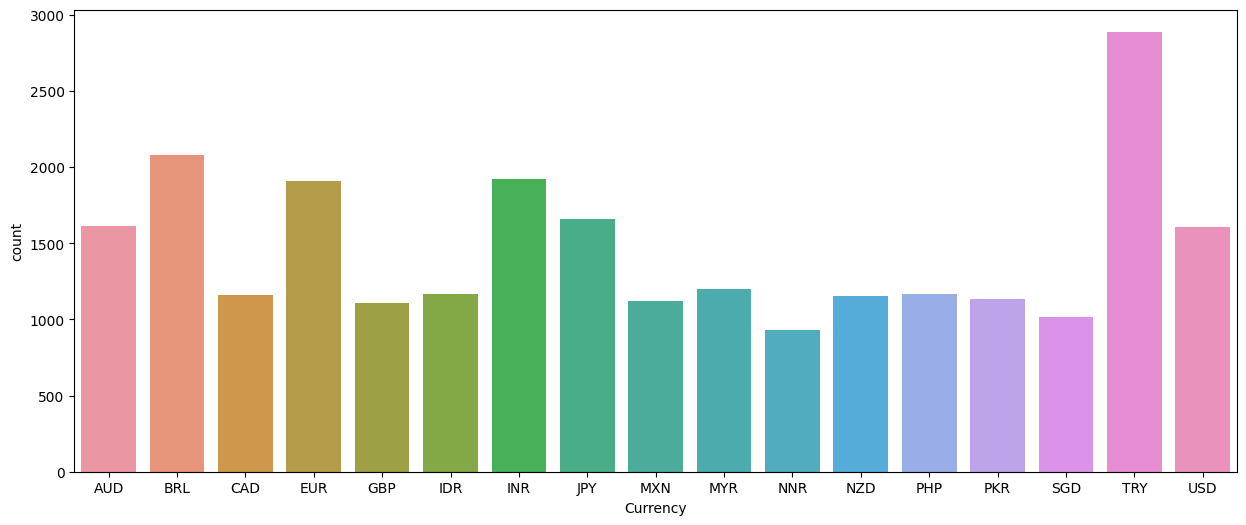

In [138]:
plt.figure(figsize=(15, 6))
sns.countplot(x=y_currency_plot)
plt.show()

In [139]:
class_counts = y_currency_plot.value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100
print("Percentage of each class in currency:")
print(class_percentages)

Percentage of each class in currency:
Currency
TRY    11.632965
BRL     8.370257
INR     7.737855
EUR     7.673407
JPY     6.678482
AUD     6.509305
USD     6.460968
MYR     4.841698
IDR     4.688633
PHP     4.688633
CAD     4.680577
NZD     4.656409
PKR     4.555708
MXN     4.519455
GBP     4.463063
SGD     4.088456
NNR     3.754129
Name: count, dtype: float64


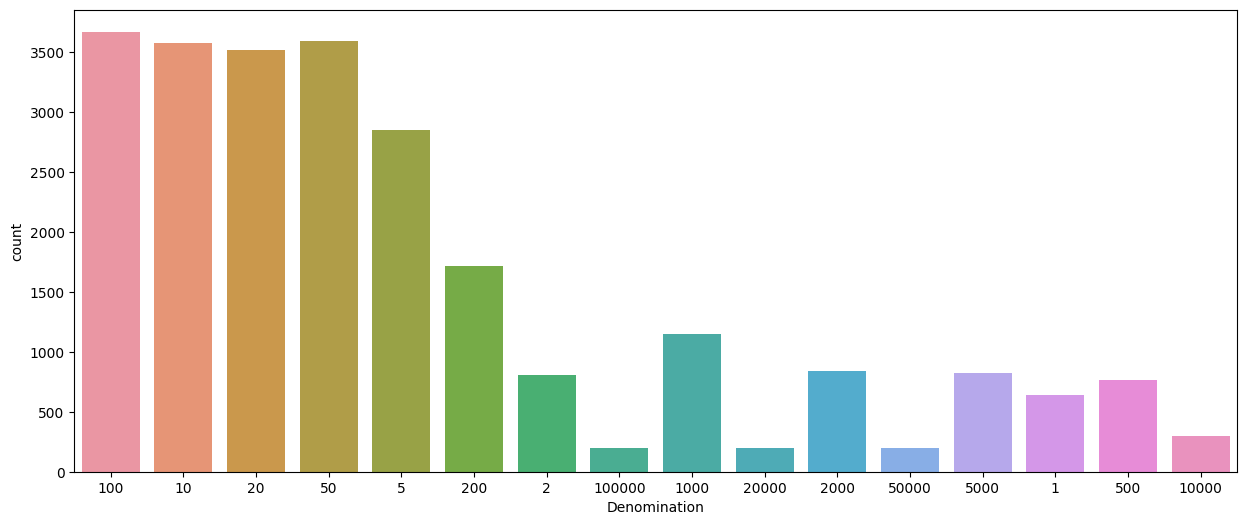

In [140]:
plt.figure(figsize=(15, 6))
sns.countplot(x=y_denomination_plot)
plt.show()

In [141]:
class_counts = y_denomination_plot.value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100
print("Percentage of each class in denomination:")
print(class_percentages)

Percentage of each class in denomination:
Denomination
100       14.778861
50        14.472730
10        14.404254
20        14.150487
5         11.467816
200        6.912108
1000       4.632240
2000       3.375493
5000       3.331185
2          3.250624
500        3.077419
1          2.590027
10000      1.212439
100000     0.781439
50000      0.781439
20000      0.781439
Name: count, dtype: float64


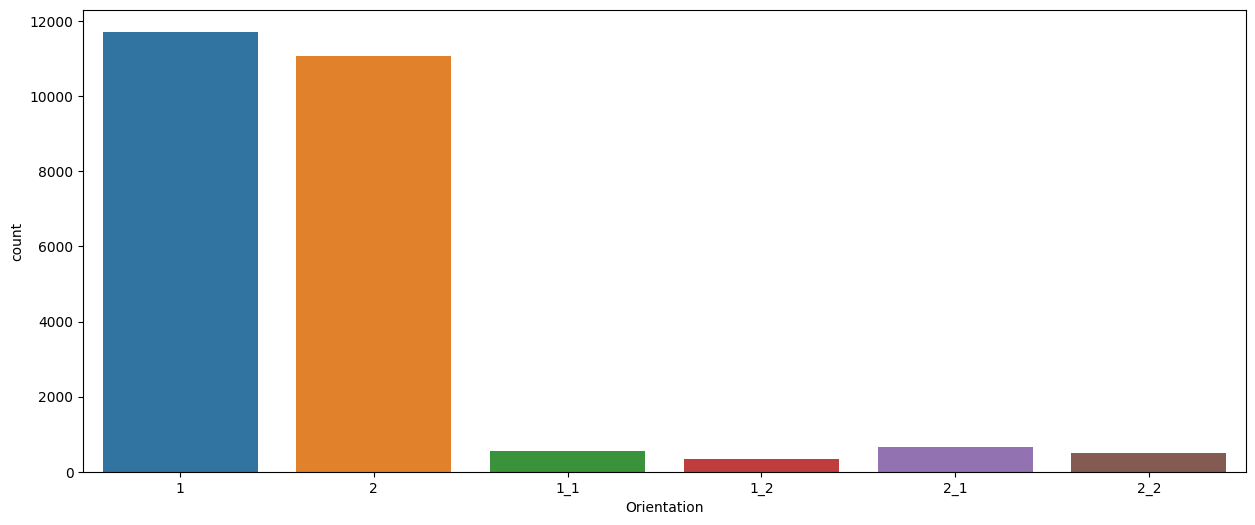

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(x=y_orientation_plot)
plt.show()

In [14]:
class_counts = y_orientation_plot.value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100
print("Percentage of each class in orientation:")
print(class_percentages)

Percentage of each class in orientation:
Orientation
1      47.208572
2      44.614517
2_1     2.610167
1_1     2.255700
2_2     1.957625
1_2     1.353420
Name: count, dtype: float64


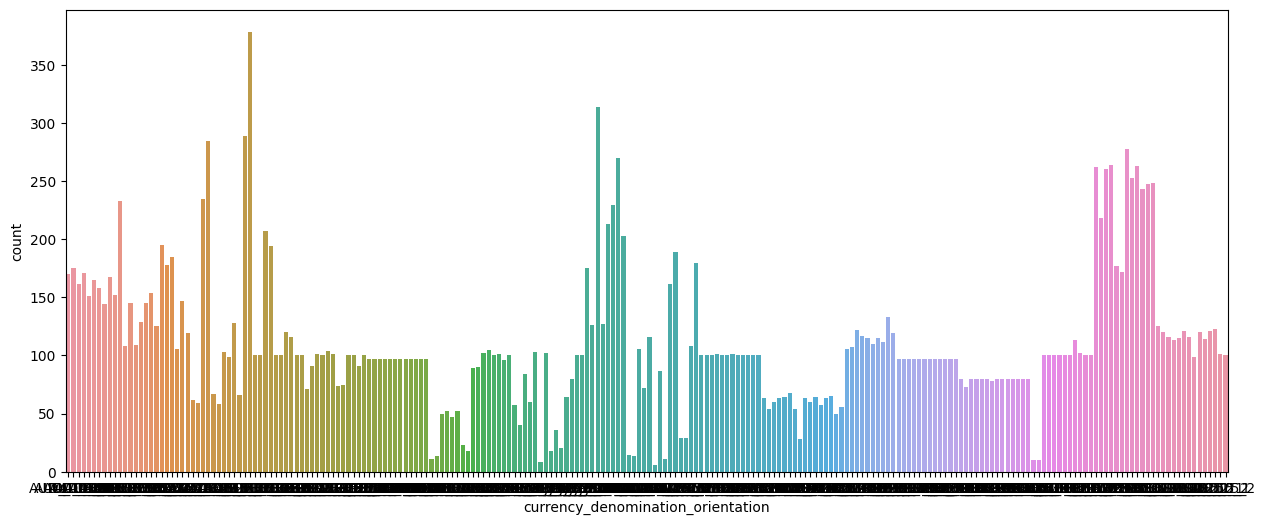

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(x=y_currency_denomination_orientation_plot)
plt.show()

In [16]:
class_counts = y_currency_denomination_orientation_plot.value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100
print("Percentage of each class in currency_denomination_orientation:")
print(class_percentages)

Percentage of each class in currency_denomination_orientation:
currency_denomination_orientation
EUR_100_2      1.526625
JPY_1000_1     1.264803
EUR_100_1      1.164102
CAD_10_2       1.147990
TRY_20_1       1.119794
                 ...   
INR_1000_1     0.044308
PKR_5_1        0.040280
PKR_5_2        0.040280
INR_500_1_2    0.032224
MXN_200_1_2    0.024168
Name: count, Length: 224, dtype: float64


In [17]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Classification Function

In [18]:
def Classifier(X_train, y_train, classifier):    
    mlp_classifier = classifier
    memory_usage_b = psutil.virtual_memory()[3]/1000000000
    start_time = time.time()
    mlp_classifier.fit(X_train, y_train)
    end_time = time.time()
    memory_usage_a = psutil.virtual_memory()[3]/1000000000
    training_time = end_time - start_time
    memory_usage = (memory_usage_a - memory_usage_b)*1000
    return mlp_classifier, training_time, memory_usage

# Grid Search Function

In [19]:
def GridSearch(param_grid, classifier, X_train, y_train):
    grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=10, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

# MLP Classification

## Currency

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y_currency, test_size= 0.2, random_state=0)
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=200, random_state=42))
y_pred= mlp_classifier.predict(X_test)

In [150]:
print(f'Predecting for Currency without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {memory_usage} MB")

Predecting for Currency without grid search:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       302
           1       0.98      0.96      0.97       430
           2       0.94      0.94      0.94       212
           3       0.98      0.97      0.98       412
           4       0.92      0.88      0.90       242
           5       0.99      0.98      0.98       257
           6       0.87      0.92      0.89       343
           7       0.97      0.97      0.97       346
           8       0.89      0.93      0.91       215
           9       0.99      1.00      0.99       249
          10       0.86      0.90      0.88       180
          11       0.92      0.92      0.92       225
          12       1.00      0.98      0.99       212
          13       0.96      0.99      0.97       229
          14       0.97      0.94      0.96       207
          15       0.98      0.97      0.98       594
          16       0.96      0.94  

In [151]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1, 1, 10],
}
grid_search = GridSearch(param_grid, MLPClassifier(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


In [152]:
classifier = grid_search.best_estimator_
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= mlp_classifier.predict(X_test)

In [153]:
print(f'Predecting for Currency with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Currency with grid search:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       300
           1       0.97      0.97      0.97       424
           2       0.98      0.93      0.95       221
           3       0.99      0.99      0.99       406
           4       0.92      0.95      0.93       224
           5       1.00      0.98      0.99       256
           6       0.93      0.91      0.92       371
           7       0.97      0.99      0.98       340
           8       0.91      0.94      0.92       216
           9       0.98      0.99      0.98       250
          10       0.94      0.87      0.90       202
          11       0.93      0.92      0.93       224
          12       1.00      1.00      1.00       208
          13       0.98      0.99      0.98       234
          14       0.98      0.97      0.98       202
          15       0.98      0.98      0.98       587
          16       0.95      0.97     

## Denomination

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y_denomination, test_size= 0.2, random_state=0)
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=200, random_state=42))
y_pred= mlp_classifier.predict(X_test)

In [155]:
print(f'Predecting for Denomination without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Denomination without grid search:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       129
           1       0.92      0.88      0.90       739
           2       0.92      0.92      0.92       735
           3       0.94      0.98      0.96       245
           4       1.00      0.96      0.98        56
           5       0.95      1.00      0.98        42
           6       0.96      0.96      0.96       135
           7       0.89      0.93      0.91       690
           8       0.92      0.96      0.94       331
           9       0.97      0.94      0.95       186
          10       1.00      0.96      0.98        46
          11       0.91      0.88      0.90       612
          12       0.91      0.88      0.90       683
          13       0.77      0.89      0.83       117
          14       0.96      0.95      0.96       184
          15       0.97      0.97      0.97        36

    accuracy                  

In [156]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1, 1, 10],
}
grid_search = GridSearch(param_grid, MLPClassifier(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_m

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [157]:
classifier = grid_search.best_estimator_
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= mlp_classifier.predict(X_test)

In [158]:
print(f'Predecting for Denomination with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Denomination with grid search:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       130
           1       0.92      0.96      0.94       682
           2       0.94      0.95      0.95       728
           3       0.95      1.00      0.98       243
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        44
           6       0.97      0.96      0.97       136
           7       0.96      0.92      0.94       749
           8       0.95      0.95      0.95       347
           9       0.97      0.94      0.95       184
          10       1.00      1.00      1.00        44
          11       0.94      0.88      0.91       632
          12       0.92      0.93      0.93       662
          13       0.81      0.98      0.89       112
          14       0.99      0.99      0.99       182
          15       1.00      0.97      0.99        37

    accuracy                     

## Orientation

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_orientation, test_size= 0.2, random_state=0)
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=200, random_state=42))
y_pred= mlp_classifier.predict(X_test)

In [21]:
print(f'Predecting for Orientation without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Orientation without grid search:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2311
           1       0.87      0.83      0.85       109
           2       0.77      0.73      0.75        66
           3       0.96      0.93      0.95      2298
           4       0.72      0.90      0.80       108
           5       0.83      0.88      0.86        74

    accuracy                           0.94      4966
   macro avg       0.85      0.87      0.86      4966
weighted avg       0.94      0.94      0.94      4966

F1 score: 0.9373
MLP Training time: 45.16890788078308 seconds
MLP Memory usage: 30.617600000000024 MB


In [22]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1, 1, 10],
}
grid_search = GridSearch(param_grid, MLPClassifier(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


In [23]:
classifier = grid_search.best_estimator_
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= mlp_classifier.predict(X_test)

In [24]:
print(f'Predecting for Orientation with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Orientation with grid search:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2425
           1       0.76      0.89      0.82        90
           2       0.74      0.85      0.79        54
           3       0.94      0.95      0.95      2217
           4       0.71      0.92      0.80       103
           5       0.86      0.87      0.86        77

    accuracy                           0.94      4966
   macro avg       0.83      0.90      0.86      4966
weighted avg       0.94      0.94      0.94      4966

F1 score: 0.9408
MLP Training time: 50.097147941589355 seconds
MLP Memory usage: 6.291456000000029 MB


## All combined

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y_currency_denomination_orientation, test_size= 0.2, random_state=0)
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=200, random_state=42))
y_pred= mlp_classifier.predict(X_test)

In [165]:
print(f'Predecting for Currency, Denomination, and Orientation without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Currency, Denomination, and Orientation without grid search:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.88      0.82      0.85        34
           2       0.70      0.85      0.77        27
           3       0.89      0.76      0.82        41
           4       0.59      0.74      0.66        27
           5       0.67      0.65      0.66        34
           6       0.88      0.88      0.88        25
           7       0.93      0.82      0.87        33
           8       0.89      0.80      0.84        30
           9       0.72      0.96      0.82        24
          10       0.87      0.94      0.90        50
          11       0.84      0.80      0.82        20
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       0.97      1.00      0.98        29
    

In [166]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1, 1, 10],
}
grid_search = GridSearch(param_grid, MLPClassifier(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_m

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [167]:
classifier = grid_search.best_estimator_
mlp_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= mlp_classifier.predict(X_test)

In [168]:
print(f'Predecting for Currency, Denomination, and Orientation with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"MLP Training time: {training_time} seconds")
print(f"MLP Memory usage: {abs(memory_usage)} MB")

Predecting for Currency, Denomination, and Orientation with grid search:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.91      0.85      0.88        34
           2       0.88      0.81      0.84        36
           3       0.83      0.83      0.83        35
           4       0.44      0.71      0.55        21
           5       0.76      0.58      0.66        43
           6       0.88      0.85      0.86        26
           7       0.93      0.87      0.90        31
           8       0.93      0.81      0.86        31
           9       0.81      0.90      0.85        29
          10       0.89      0.92      0.91        52
          11       0.89      0.81      0.85        21
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       0.97      1.00      0.98        29
       

# SVC Classification

## Currency

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y_currency, test_size= 0.2, random_state=0)
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, SVC(kernel='linear', random_state=42))
y_pred= svc_classifier.predict(X_test)

In [170]:
print(f'Predecting for Currency without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Currency without grid search:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       314
           1       0.98      0.97      0.98       423
           2       0.97      0.92      0.94       222
           3       0.98      0.98      0.98       407
           4       0.90      0.90      0.90       229
           5       1.00      1.00      1.00       254
           6       0.90      0.90      0.90       361
           7       0.98      0.98      0.98       343
           8       0.90      0.96      0.93       209
           9       0.98      0.98      0.98       251
          10       0.87      0.91      0.89       181
          11       0.94      0.89      0.91       234
          12       1.00      1.00      1.00       208
          13       0.97      0.99      0.98       232
          14       0.98      0.99      0.98       198
          15       0.98      0.97      0.98       598
          16       0.95      0.96  

In [171]:
param_grid = {
    'C': [0.01, 0.1, 1],  
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}
grid_search = GridSearch(param_grid, SVC(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}


In [172]:
classifier = grid_search.best_estimator_
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= svc_classifier.predict(X_test)

In [173]:
print(f'Predecting for Currency with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Currency with grid search:

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       317
           1       0.97      0.98      0.98       416
           2       0.98      0.95      0.97       218
           3       0.98      0.98      0.98       408
           4       0.93      0.93      0.93       229
           5       0.99      1.00      0.99       252
           6       0.91      0.89      0.90       374
           7       0.98      0.99      0.99       343
           8       0.91      0.98      0.94       207
           9       0.98      1.00      0.99       248
          10       0.90      0.89      0.90       189
          11       0.93      0.90      0.91       232
          12       1.00      1.00      1.00       208
          13       0.97      0.99      0.98       232
          14       0.98      0.99      0.99       197
          15       0.98      0.97      0.98       595
          16       0.95      0.96     

## Denomination

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y_denomination, test_size= 0.2, random_state=0)
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, SVC(kernel='linear', random_state=42))
y_pred= svc_classifier.predict(X_test)

In [175]:
print(f'Predecting for Denomination without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Denomination without grid search:

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       135
           1       0.90      0.85      0.88       744
           2       0.87      0.88      0.88       724
           3       0.92      0.98      0.95       239
           4       1.00      0.98      0.99        55
           5       1.00      1.00      1.00        44
           6       0.93      0.93      0.93       136
           7       0.89      0.88      0.88       734
           8       0.93      0.93      0.93       345
           9       0.94      0.97      0.95       175
          10       0.98      1.00      0.99        43
          11       0.85      0.86      0.85       589
          12       0.87      0.86      0.87       672
          13       0.81      0.95      0.88       116
          14       0.98      0.99      0.99       179
          15       1.00      1.00      1.00        36

    accuracy                  

In [176]:
param_grid = {
    'C': [0.01, 0.1, 1],  
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}
grid_search = GridSearch(param_grid, SVC(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}


In [177]:
classifier = grid_search.best_estimator_
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= svc_classifier.predict(X_test)

In [178]:
print(f'Predecting for Denomination with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Denomination with grid search:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       129
           1       0.94      0.91      0.93       730
           2       0.95      0.94      0.95       737
           3       0.96      0.99      0.97       246
           4       1.00      0.95      0.97        57
           5       1.00      1.00      1.00        44
           6       0.94      0.95      0.94       134
           7       0.94      0.94      0.94       724
           8       0.94      0.96      0.95       340
           9       0.96      0.97      0.96       177
          10       0.98      1.00      0.99        43
          11       0.93      0.93      0.93       593
          12       0.94      0.93      0.94       676
          13       0.86      0.98      0.92       118
          14       0.99      0.99      0.99       182
          15       1.00      1.00      1.00        36

    accuracy                     

## Orientation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_orientation, test_size= 0.2, random_state=0)
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, SVC(kernel='linear', random_state=42))
y_pred= svc_classifier.predict(X_test)

In [26]:
print(f'Predecting for Orientation without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Orientation without grid search:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2348
           1       0.76      0.80      0.78       100
           2       0.69      0.83      0.75        52
           3       0.93      0.90      0.92      2310
           4       0.61      0.86      0.72        95
           5       0.74      0.95      0.83        61

    accuracy                           0.90      4966
   macro avg       0.78      0.88      0.82      4966
weighted avg       0.91      0.90      0.91      4966

F1 score: 0.9059
SVC Training time: 18.856128454208374 seconds
SVC Memory usage: 46.74764799999976 MB


For some reason, applying SVC to the orientation column takes a lot of time. We will take the previous grid and assume it is the best grid.

In [27]:
classifier = SVC(C=0.01, gamma=1, kernel='poly')
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= svc_classifier.predict(X_test)

In [28]:
print(f'Predecting for Orientation with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Orientation with grid search:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2403
           1       0.85      0.88      0.86       101
           2       0.74      0.87      0.80        53
           3       0.95      0.96      0.96      2236
           4       0.74      0.96      0.84       103
           5       0.85      0.94      0.89        70

    accuracy                           0.95      4966
   macro avg       0.85      0.93      0.88      4966
weighted avg       0.95      0.95      0.95      4966

F1 score: 0.9480
SVC Training time: 13.739545345306396 seconds
SVC Memory usage: 28.684288000000002 MB


## All combined

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y_currency_denomination_orientation, test_size= 0.2, random_state=0)
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, SVC(kernel='linear', random_state=42))
y_pred= svc_classifier.predict(X_test)

In [184]:
print(f'Predecting for Currency, Denomination, and Orientation without grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Currency, Denomination, and Orientation without grid search:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.91      0.91      0.91        32
           2       0.88      0.71      0.78        41
           3       0.83      0.85      0.84        34
           4       0.62      0.68      0.65        31
           5       0.64      0.60      0.62        35
           6       0.92      0.92      0.92        25
           7       0.97      0.88      0.92        32
           8       0.93      0.76      0.83        33
           9       0.81      0.90      0.85        29
          10       0.87      1.00      0.93        47
          11       1.00      0.79      0.88        24
          12       1.00      1.00      1.00        36
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        24
          15       0.97      1.00      0.98        29
    

In [185]:
param_grid = {
    'C': [0.01, 0.1, 1],  
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}
grid_search = GridSearch(param_grid, SVC(), X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [186]:
classifier = grid_search.best_estimator_
svc_classifier, training_time, memory_usage = Classifier(X_train, y_train, classifier)
y_pred= svc_classifier.predict(X_test)

In [187]:
print(f'Predecting for Currency, Denomination, and Orientation with grid search:\n')
print(classification_report(y_pred, y_test))
fs = f1_score(y_pred, y_test, average='weighted')
print(f"F1 score: {fs:.4f}")
print(f"SVC Training time: {training_time} seconds")
print(f"SVC Memory usage: {abs(memory_usage)} MB")

Predecting for Currency, Denomination, and Orientation with grid search:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.91      0.91      0.91        32
           2       0.88      0.71      0.78        41
           3       0.83      0.85      0.84        34
           4       0.62      0.68      0.65        31
           5       0.64      0.60      0.62        35
           6       0.92      0.92      0.92        25
           7       0.97      0.88      0.92        32
           8       0.93      0.76      0.83        33
           9       0.81      0.90      0.85        29
          10       0.87      1.00      0.93        47
          11       1.00      0.79      0.88        24
          12       1.00      1.00      1.00        36
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        24
          15       0.97      1.00      0.98        29
       